Solving the following continuous problem. </br>
Given $\Omega = [0;3] \times [0;2]$, solve:
$$
\begin{aligned}
-\Delta u &= f \quad u \in \Omega,
u &= g,
\end{aligned}
$$
where the source is $f = 8\pi^2\sin(2\pi x) \cos(2\pi y)$, and $g=\sin(2\pi x)\cos(2\pi y)$ is the exact solution.

In [1]:
# import packages
from PoissonSolver import mesh, problem, utils
import numpy as np
import json
import matplotlib.pyplot as plt

In [2]:
# read data
filePath = "data.json"
with open(filePath, 'r') as file:
   data = json.load(file)

In [3]:
# call to the constructor generating the mesh
grid = mesh.Mesh(data)
# we can plot the grid, but the grid is too much refined
# grid.plot()

In [4]:
# employ custom utility to read the forcing and the solution from the data.json file
f = utils.parseFunction(data['source'])
g = utils.parseFunction(data['exact'])

In [5]:
# assemble the problem
pb = problem.Problem(grid, data)
# assemble matrix stiff
pb.stiff(grid)
# assemble source term
pb.source(grid, f)

In [6]:
# impose Dirichlet bc in a strong manner
pb.dirichlet(grid, g)

In [7]:
# solve the algebric problem
uh = pb.solve()

In [8]:
# post-process
x = np.linspace(data['a'], data['b'], data['nx'])
y = np.linspace(data['c'], data['d'], data['ny'])
x, y = np.meshgrid(x, y)
z = g(x,y)

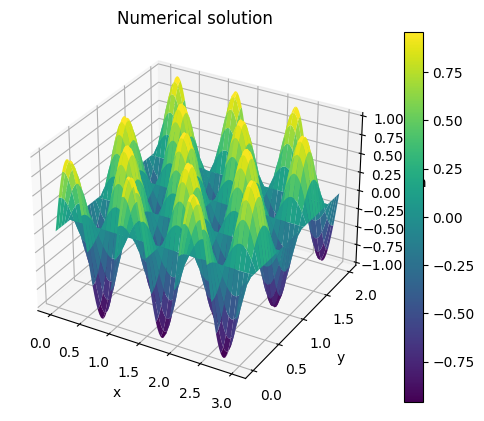

In [9]:
# Create a figure and a 3D axis for the solution plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, uh.reshape(data["ny"], data["nx"]), cmap='viridis')
ax.set_title("Numerical solution")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u_h')
fig.colorbar(surf)
plt.show()

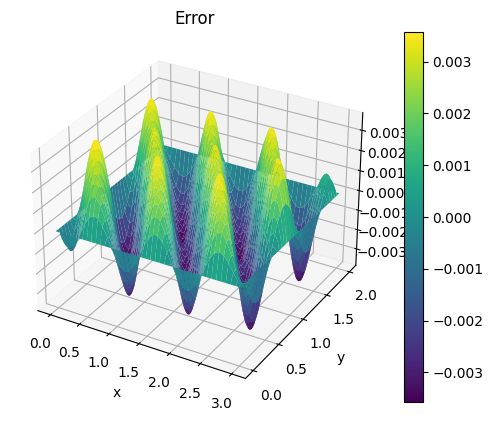

In [10]:
# Create a figure and a 3D axis for the error plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(x, y, uh.reshape(data["ny"], data["nx"]) - z, cmap='viridis')
ax.set_title("Error")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u - u_h')
fig.colorbar(surf)
plt.show()